In [2]:
import nltk
import re

NLTK Tagging
Interface for tagging each token in a sentence with supplementary information, such as its part of speech.
The process of classifying words into their parts of speech and labeling them accordingly is called tagging

In [6]:
from nltk import word_tokenize,pos_tag
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

Pos tagger - it's pretrained model,based on perceptron

In [9]:
words = []
with open('./speech.txt') as f:
    for line in f:
        words.append(line.split(' '))

words_list = []
for i in words:
    for j in i:
        #takes cares of the puncutation and newline character
        res = re.sub(r"\n", "", j)
        res = re.sub(r"[^\w\s]","", res)
        text = nltk.word_tokenize(res)
        #  Using a Tagger. Which is part-of-speech, like nouns,verbs, adverbs 
        words_list.append(nltk.pos_tag(text)) 

In [10]:
print(words_list)

[[('I', 'PRP')], [('speak', 'NN')], [('tonight', 'NN')], [('of', 'IN')], [('gratitude', 'NN')], [('achievement', 'NN')], [('and', 'CC')], [('high', 'JJ')], [('hopes', 'NNS')], [('for', 'IN')], [('our', 'PRP$')], [('country', 'NN')], [('Tonight', 'NN')], [('I', 'PRP')], [('think', 'NN')], [('first', 'RB')], [('of', 'IN')], [('those', 'DT')], [('who', 'WP')], [('helped', 'VBD')], [('get', 'VB')], [('me', 'PRP')], [('here', 'RB')], [], [('starting', 'VBG')], [('with', 'IN')], [('the', 'DT')], [('people', 'NNS')], [('of', 'IN')], [('Tennessee', 'NN')], [('Then', 'RB')], [('those', 'DT')], [('who', 'WP')], [('braved', 'VBN')], [('the', 'DT')], [('first', 'RB')], [('snows', 'NNS')], [('of', 'IN')], [('Iowa', 'NNP')], [('and', 'CC')], [('New', 'NNP')], [('Hampshire', 'NNP')], [], [('and', 'CC')], [('all', 'DT')], [('of', 'IN')], [('you', 'PRP')], [('here', 'RB')], [('from', 'IN')], [('all', 'DT')], [('over', 'IN')], [('this', 'DT')], [('country', 'NN')], [('who', 'WP')], [('have', 'VB')], [('

Bigram
a sequence of two adjacent elements from a string of tokens

In [3]:

from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\chari\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
#the data comes from the nltk package 
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')


In [20]:
from nltk.tag import BigramTagger

In [22]:
#split the training and testing set
s1 =  int(len(brown_tagged_sents) * 0.7)
train = brown_tagged_sents[:size]
test = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train)

# Evaluate
print ("Evaluation 2gram on train set ", bigram_tagger.evaluate(train))
print ("Evaluation 2gram on test set ", bigram_tagger.evaluate(test))

Evaluation 2gram on train set  0.8009985528219971
Evaluation 2gram on test set  0.09032237553252369


Example

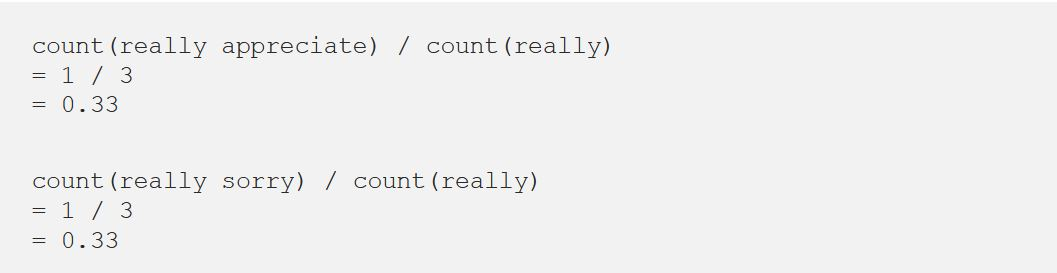

nltk.tag.hmm module
Hidden Markov Models used to assign the correct label sequence to sequential data or assess the probability of a given data or sequence.These models are finite state machines characterised by an umber of states, transition betwen trhese states and output symbols emitted while in each state

In [23]:
from nltk.tag import HiddenMarkovModelTagger


In [36]:
brown_tags_words = []
for i in brown.tagged_sents():
    brown_tags_words.append(("START","START"))
    brown_tags_words.extend([(tag[:2],word) for (word,tag) in i])
    brown_tags_words.append(("END","END"))
# conditional frequency distribution
cfd_tagwords = nltk.ConditionalFreqDist(brown_tags_words)
# conditional probability distribution
cpd_tagwords = nltk.ConditionalProbDist(cfd_tagwords, nltk.MLEProbDist)

In [38]:
print("The probability of an adjective (JJ) being 'new' is", cpd_tagwords["JJ"].prob("new"))
print("The probability of a verb (VB) being 'duck' is", cpd_tagwords["VB"].prob("duck"))

The probability of an adjective (JJ) being 'new' is 0.01472344917632025
The probability of a verb (VB) being 'duck' is 6.042713350943527e-05


In [39]:
brown_tags = [tag for(tag,word) in brown_tags_words]
#used to record the number of times each sample occurred
cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(brown_tags))
#calculate the condiation probability of the occurrence of the word 
# P(ti | t{i-1})
cpd_tags = nltk.ConditionalProbDist(cfd_tags, nltk.MLEProbDist)

In [40]:
print("If we have just seen 'DT', the probability of 'NN' is", cpd_tags["DT"].prob("NN"))
print( "If we have just seen 'VB', the probability of 'JJ' is", cpd_tags["VB"].prob("DT"))
print( "If we have just seen 'VB', the probability of 'NN' is", cpd_tags["VB"].prob("NN"))

If we have just seen 'DT', the probability of 'NN' is 0.5057722522030194
If we have just seen 'VB', the probability of 'JJ' is 0.016885067592065053
If we have just seen 'VB', the probability of 'NN' is 0.10970977711020183


In [41]:
#let's evalaute the result
prob_tagsequence = cpd_tags["START"].prob("PP") * cpd_tagwords["PP"].prob("I") * \
    cpd_tags["PP"].prob("VB") * cpd_tagwords["VB"].prob("want") * \
    cpd_tags["VB"].prob("TO") * cpd_tagwords["TO"].prob("to") * \
    cpd_tags["TO"].prob("VB") * cpd_tagwords["VB"].prob("race") * \
    cpd_tags["VB"].prob("END")

print( "The probability of the tag sequence 'START PP VB TO VB END' for 'I want to race' is:", prob_tagsequence)

The probability of the tag sequence 'START PP VB TO VB END' for 'I want to race' is: 1.0817766461150474e-14
